In [1]:
from IPython.display import Image

## 5장 차원 축소를 사용한 데이터 압축

- 특성 추출 : 차원 축소를 위한 특성 선택의 방법
- 주성분 분석을 사용한 비지도 데이터 압축하기
- 지도방식의 차원 축소 기법인 선형 판별 분석을 이용하여 클래스 구별 능력 최대화하기
- 커널 PCA를 사용한 비선형 차원 축소하기


### 5.1 주성분 분석을 통한 비지도 차원 축소

- 특성 선택 : 원본 특성을 유지 (순차 후진 선택)
- 특성 추출 : 새로운 특성 공간으로 데이터를 변환하거나 투영
  
특성 추출로 저장 공간을 절약하거나 학습 알고리즘의 계산 효율성을 향상할 뿐만 아니라 차원의 저주 문제를 감소시켜 예측 성능을 향상하기도 합니다.  

#### 5.1.1 주성분 분석의 주요 단계

- 비지도 선형 변환 기법(PCA) : 특성 추출과 차원 축소 용도로 많은 분야에서 널리 사용한다.
- PCA를 많이 사용하는 애플리케이션에는 탐색적 데이터 분석과 주식 거래 시장의 잡음 제거, 생물정보학 분야에서 게놈 데이터나 유전자 발현 분석이 있다.
- PCA는 특성 사이의 상관관계를 기반으로 하여 데이터에 있는 어떤 패턴을 찾을 수 있습니다.
- 고차원 데이터에서 분산이 가장 큰 방향을 찾고 좀 더 작거나 같은 수의 차원을 갖는 새로운 부분 공간으로 이를 투영한다.
- 새새로운 부분 공간의 직교 좌표는 주어진 조건하에서 분산이 최대인 방향으로 해석할 수 있다.

In [2]:
Image(url='https://git.io/JtsvW', width=400)

x1과 x2는 원본 특성 축이고 PC1과 PC2는 주성분이다.  
PCA를 사용하여 차원을 축소하기 위해 d$*$k차원의 변환 행렬 W를 만든다.  
이 행렬로 훈련 샘플의 특성 벡터 x를 새로운 k차원의 특성 부분 공간으로 매핑한다.  
이 부분 공간은 원본 d차원의 특성 공간보다 작은 차원을 가진다.  
$x = $[$x_1,x_2, \dots ,x_d$]$, x \in R^d$  
$xW = z,    W \in R^{d*k}$  
즉, z는 k차원의 부분 공간으로 변환된다.  
모든 주성분은 다른 주성분들과 상관관계가 없다는 제약하에 가장 큰 분산을 가진다.  
입력 특성에 상관관계가 있더라도 만들어진 주성분은 서로 직각을 이룰 것이다.  
PCA 방향은 데이터 스케일에 매우 민감하다.  
특성의 스케일이 다르고 모든 특성의 중요도를 동일하게 취급하려면 PCA를 적용하기 전에 특성을 표준화 전처리 해야한다.  

##### PCA 알고리즘 사용 방법 단계
- d차원 데이터셋을 표준화 전처리한다.
- 공분산 행렬을 만든다.
- 공분산 행렬을 고유 벡터와 고윳값으로 분해한다.
- 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매깁니다.
- 교윳값이 가장 큰 k개의 고유 벡터를 선택합니다. 여기서 k는 새로운 특성 부분 공간의 차원이다.
- 최상위 k개의 고유 벡터로 투영 행렬 W를 만든다.
- 투영 행렬 W를 사용해서 d차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환한다.

#### 5.1.2 주성분 추출 단계  

- PCA 처음 네 단계를 처리한다.  
1. 데이터를 표준화 전처리합니다.
2. 공분산 행렬을 구성합니다.
3. 공분산 행렬의 고윳값과 고유 벡터를 구합니다.
4. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 매깁니다.

In [3]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

wine 데이터셋을 7:3 비율로 훈련 데이터와 테스트 데이터셋으로 나누고 표준화를 적용하여 단위 분산을 갖도록 한다.

In [4]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

# 표준화
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

- $x_j와 x_k$사이의 공분산  
 $\sigma_{jk} = $ ${1} \over {n-1}$$ \sum_{i=1}^n (x_j^{(i)}-\mu_j)(x_k^{(i)}-\mu_k)$  
$\mu$는 샘플의 평균이고, 데이터셋을 표준화 전처리했기 때문에 0이다.  
- 고유 벡터와 고윳값 쌍을 구하기  
  $\sum v = \lambda v$  
  이때 $\lambda$는 스케일을 담당하는 고윳값이다.

In [5]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\n고윳값 \n%s' % eigen_vals)


고윳값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


#### 5.1.3 총 분산과 설명된 분산
  
데이터셋 차원을 새로운 특성 부분 공간으로 압축하여 줄여야 하기에 가장 많은 정보를 가진 고유 벡터 일부만 선택한다.  
고윳값은 교유 벡터의 크기를 결정하므로 고윳값을 내림차순으로 정렬한다.  
고윳값 순서에 따라 최상위 k개의 고유 벡터를 선택한다.  
가장 정보가 많은 k개의 고유 벡터를 선택하기 전에 고윳값의 설명된 분산비율을 그려본다.  
- 설명된 분산 비율 : 전체 고윳값의 합에서 고윳값 $\lambda_j$의 비율


In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

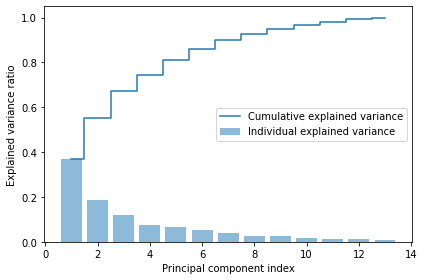

In [7]:
import matplotlib.pyplot as plt


plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

#### 5.1.4 특성 변환
공분산 행렬을 고유 베겉와 고윳값 쌍으로 성공적으로 분해한 후 Wine 데이터셋을 새로운 주성분 축으로 변환하는 나머지 세 단계를 진행한다.
1. 고윳값이 가장 큰 k개의 고유 벡터를 선택한다. 여기서 k는 새로운 특성 부분 공간의 차원이다.
2. 최상위 k개의 고유 벡터로 투영 행렬 W를 만든다.
3. 투영 행렬 W를 사용해서 d차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환한다.  
  
고윳값의 내림차순으로 고유 벡터를 정렬하고, 선택된 고유 벡터로 투영 행렬을 구성한다.  
이 투영 행렬을 사용하여 저차원 부분 공간으로 변환한다.  

In [8]:
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유벡터) 튜플을 정렬합니다
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

다음 가장 큰 두 개의 고윳값에 해당하는 고유 벡터를 선택한다. 이 데이터셋에 있는 분산읜 60%를 잡아낼 수 있다.  
2차원 산점도를 그리기 위해 두 개의 고유 벡터만 선택했지만, 실전에서는 계산 효율성과 모델 성능 사이의 절충점을 찾아 주성분 개수를 결정해야한다.

In [9]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W:\n', w)

투영 행렬 W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [10]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

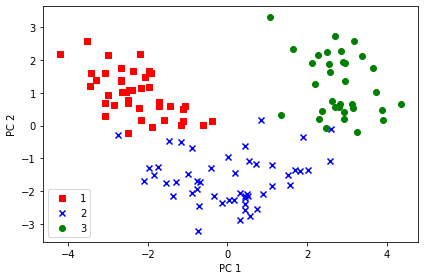

In [11]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

y축 (두 번째 주성분)보다 x축(첫 번째 주성분)을 따라 더 넓게 퍼져있다.  
선형 분류기가 클래스들을 잘 분리할 수 있을 것 같다고 직관적으로 확인할 수 있다.

#### 5.1.5 사이킷런의 주성분 분석
  
  
PCA 클래스는 사이킷런의 변환기 클래스 중 하나이다.  
훈련 데이터를 사용하여 모델을 훈련하고 같은 모델 파라미터를 사용하여 훈련 데이터셋과 테스트 데이터셋을 변환한다.  
사이킷런의 PCA 클래스를 Wine 데이터셋의 훈련 데이터셋에 적용하고 로지스틱 회귀로 변환된 샘플 데이터를 분류해보자.  

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

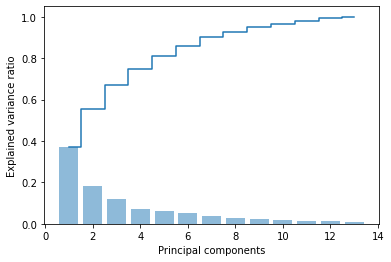

In [13]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [14]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

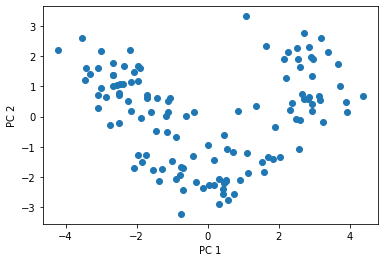

In [15]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스별로 샘플을 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [17]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_pca, y_train)

/var/folders/52/6m61ph710vs5094glq5tbhwh0000gn/T/ipykernel_16037/1829650647.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


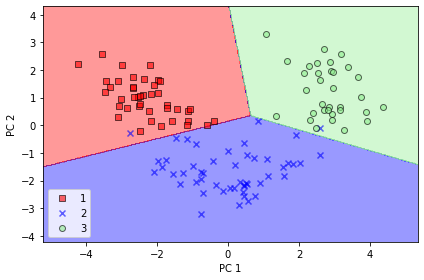

In [18]:
# 샘플데이터 결과
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

/var/folders/52/6m61ph710vs5094glq5tbhwh0000gn/T/ipykernel_16037/1829650647.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


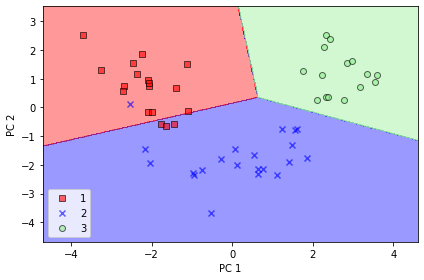

In [19]:
# 테스트 데이터 결과
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

In [20]:
# 전체 주성분의 설명된 분산 비율

# n_components=None 차원축소, 분산의 크기 순서대로 주성분이 모두 반환
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [21]:
# (0, 1) 사이 실수를 입력하면 설명된 분산의 비율을 나타낸다. 이 비율을 달성하기 위해 필요한 주성분 개수를 선택한다.
pca = PCA(n_components=0.95)
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 10
설명된 분산 비율: 0.9662714406558742


In [22]:
# 'mle'로 지정하면 토마스 민카가 제안한 차원 선택 방식을 사용한다.
pca = PCA(n_components='mle')
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 9
설명된 분산 비율: 0.9499753029186232


PCA의 가장 큰 제약 사항 중 하나는 배치로만 실행되기 때문에 대용량 데이터셋을 처리하려면 많은 메모리가 필요하다.  
IncrementalPCA를 사용하면 데이터셋의 일부를 사용하여 반복적으로 훈련할 수 있다.  
batch size의 기본값은 특성 개수의 5배로 설정되어있다.

In [24]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=9)
for batch in range(len(X_train_std)//25+1):
    X_batch = X_train_std[batch*25:(batch+1)*25]
    ipca.partial_fit(X_batch)

print('주성분 개수:', ipca.n_components_)
print('설명된 분산 비율:', np.sum(ipca.explained_variance_ratio_))

주성분 개수: 9
설명된 분산 비율: 0.9478392700446663


### 5.2 선형 판별 분석을 통한 지도 방식의 데이터 압축

- 선현 판별 분석(LDA) : 규제가 없는 모델에서 차원의 저주로 인한 과대 적합 정도를 줄이고 계산 효율성을 높이기 위한 특성 추출의 기법
- PCA : 데이터 셋에 있는 분산이 최대인 직교 성분 축을 찾는다.
- LDA : 클래스를 최적으로 구분할 수 있는 특성 부분 공간을 찾는다.

#### 5.2.1 주성분 분석 vs 선형 판별 분석

- 모두 데이터셋의 차원 개수를 줄일 수 있는 선형 변환 기법이다.
- PCA는 비지도 학습 알고리즘 || LDA는 지도 학습 알고리즘

이진 분류 문제를 위한 LDA 개념을 요약한 사진이다.  
클래스 1의 샘플은 동그라미, 클래스 2의 샘플은 +이다.

In [25]:
Image(url='https://git.io/Jtsv8', width=400)

x축으로 투영하는 선형 판별 벡터는 두개의 정규 분포 클래스를 잘 구분한다.  
y축으로 투영하는 선형 판별 벡터는 데이터셋에 있는 분산을 많이 잡아내지만 클래스 판별 정보가 없기 때문에 좋은 선형 판별 벡터가 되지 못한다.  
- LDA는 데이터가 정규 분포라고 가정한다.
- 클래스가 동일한 공분산 행렬을 가지고 훈련 샘플은 서로 통계적으로 독립적이라고 가정한다.
- 하나 이상의 가정이 조금 위반되더라도 여전히 LDA는 차원 축소를 상당히 잘 수행한다.


#### 5.2.2 선형 판별 분석의 내부 동작 방식

##### LDA 수행에 필요한 주요 단계
1. d차원의 데이터셋을 표준화 전처리한다.(d는 특성의 개수)
2. 각 클래스에 대해 d차원 평균 벡터를 계산한다.
3. 클래스 간의 산포 행렬 $S_B$와 클래스 내 산포행렬 $S_W$를 구성한다.
4. $S_W^{-1} S_B$행렬의 고유 벡터와 고윳값을 계산한다.
5. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순서를 매긴다.
6. 고윳값이 가장 큰 k개의 고유 벡터를 선택하여 d*k 차원의 변환 행렬 W를 구성한다. 이 행렬의 열이 고유 벡터이다.
7. 변환 행렬 W를 사용하여 샘플을 새로운 특성 부분 공간으로 투영한다.
  
LDA는 행렬을 고윳값과 고유 벡터로 분해하여 새로운 저차원 특성 공간을 구성한다는 점에서 PCA와 유사하다.  
하지만, LDA는 단계 2에서 계산하는 평균 벡터를 만드는 데 클래스 레이블 정보를 사용한다.

#### 5.2.3 산포 행렬 계산
평균 벡터를 사용하여 클래스 간의 산포 행렬과 클래스 내 산포 행렬을 구성한다.  
평균 벡터 $m_i$는 클래스 i의 샘플에 대한 특성의 평균값 $\mu_m$을 저장한다.  
$m_i = $${1}\over {n_i}$$ \sum_{x\in D_i} x_m$

In [26]:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



평균 벡터를 사용하여 클래스 내 산포 행렬 $S_W$를 계산할 수 있다.  
$S_W = \sum^c_{i=1}S_i$  
이 행렬을 개별 클래스 i의 산포 행렬 $S_i$를 더해서 구한다.  
$S_i = \sum_{x\in D_i}(x-m_i)^T(x-m_i)$

In [27]:
d = 13 # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # 각 클래스에 대한 산포 행렬
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # 열 벡터를 만듭니다
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # 클래스 산포 행렬을 더합니다

print('클래스 내의 산포 행렬: %sx%s' % (S_W.shape[0], S_W.shape[1]))

클래스 내의 산포 행렬: 13x13


In [28]:
# 산포 행렬을 계산할 때 훈련 데이터셋의 클래스 레이블이 균등하게 분포되어 있다고 가정한다.
# 클래스 레이블의 개수를 출력해보자.
print("클래스 레이블 분포: %s"
     % np.bincount(y_train)[1:])

클래스 레이블 분포: [41 50 33]


개별 산포 행렬 $S_i를 산포 행렬 S_W$로 모두 더하기 전에 스케일을 조정해야 한다.  
산포 행렬을 클래스 샘플 개수 $n_i$로 나누면 사실 산포 행렬을 계산하는 것이 공분산 행렬 $\sum_i$를 계산하는 것과 같다.  
즉, 공분산 행렬을 산포 행렬의 정규화이다.  
$\sum_i = $$1\over{n_i}$$S_i = $$1\over{n_i}$$\sum_{x\in D_i}(x-m_i)^T(x-m_i)$  

In [29]:
d = 13  # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('스케일 조정된 클래스 내의 산포 행렬: %sx%s' % 
      (S_W.shape[0], S_W.shape[1]))

스케일 조정된 클래스 내의 산포 행렬: 13x13


클래스 내 산포 행렬을 계산한 후 다음 단계로 넘어가 클래스 간의 산포 행렬 $S_B$를 계산하겠습니다.  
$S_B = \sum^c_{i=1}n_i(m_i-m)^T(m_i-m)$  
m은 모든 클래스의 샘플을 포함하여 계산된 전체 평균

In [30]:
# m
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # 열 벡터로 만들기
d = 13  # 특성 개수
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # 열 벡터로 만들기
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('클래스 간의 산포 행렬: %sx%s' % (S_B.shape[0], S_B.shape[1]))

클래스 간의 산포 행렬: 13x13


#### 5.2.4 새로운 특성 부분 공간을 위해 선형 판별 벡터 선택
- LDA의 남은 단계는 PCA와 유사하다. 공분산 행렬에 대한 고윳값 분해를 수행하는 대신 $S_W^{-1}S_B$의 고윳값을 계산한다.

In [34]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
# np.linalg.eigh를 이용하는 것이 더 좋다. 위 방식은 비대칭일 경우 복소수를 반환할 수 있다.

In [33]:
# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# (고윳값, 고유벡터) 튜플을 큰 값에서 작은 값 순서대로 정렬합니다.
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# 고윳값의 역순으로 올바르게 정렬되었는지 확인합니다.
print('내림차순의 고윳값:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

내림차순의 고윳값:

349.617808905994
172.76152218979394
5.684341886080802e-14
3.63360048868007e-14
2.9156879278165203e-14
2.9156879278165203e-14
1.6567701054331684e-14
1.6567701054331684e-14
1.6005457633433247e-14
1.6005457633433247e-14
1.4744591544911198e-14
6.2713986138368715e-15
2.0474258990949274e-15


LDA에서 선형 판별 벡터는 최대 c-1개다. (c는 클래스 레이블의 개수)  
클래스 내 산포 행렬 $S_B$가 랭크 1 또는 그 이하인 c개의 행렬을 합한 것이기 때문이다.   
0이 아닌 교윳값은 두 개만 나타난다. (1,2번을 제외하곤 0으로 정확히 표현되지는 않는다.)

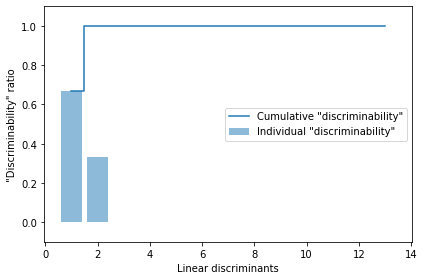

In [38]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

##### 두 개의 선형 판별 벡터가 Wine 데이터셋에 있는 정보 중 거의 100%를 잡아낸다.  
두 개의 벡터를 열로 쌓아서 변환 행렬 W를 만들자.

In [39]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('행렬 W:\n', w)

행렬 W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


#### 5.2.5 새로운 특성 공간으로 샘플 투영
##### W를 훈련 데이터 셋에 곱해서 데이터를 변환한다. -> $X^{'} = XW$

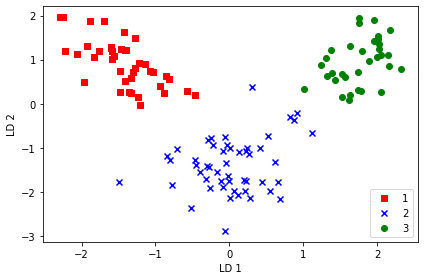

In [40]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()

#### 5.2.6 사이킷런의 LDA
- 사이킷런에 구현된 LDA 클래스를 살펴보자.

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

/var/folders/52/6m61ph710vs5094glq5tbhwh0000gn/T/ipykernel_16037/1829650647.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


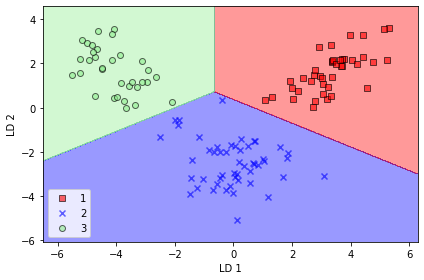

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

/var/folders/52/6m61ph710vs5094glq5tbhwh0000gn/T/ipykernel_16037/1829650647.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


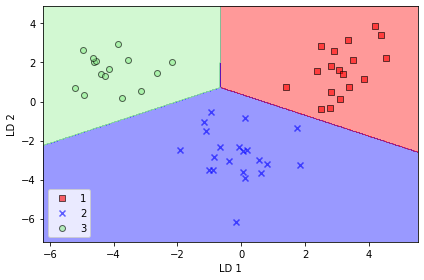

In [43]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_10.png', dpi=300)
plt.show()

#### 사이킷런의 LDA 구현

###### 전체 평균과 클래스별 평균 사이의 관계 : $m = \sum_{i=1}^c $${n_i}\over n $$m_i$
###### 산포 형렬 $S_w$에 적용하고 클래스별 산포 행렬 $S_i$를 클래스별 공분산 행렬 $\sum_i$로 정의하면 $S_W = \sum_{i=1}^c $${n_i}\over{n}$$S_i = \sum_{i=1}^c $${n_i}\over{n}$$\sum_i$ 

In [44]:
y_uniq, y_count = np.unique(y_train, return_counts=True)
priors = y_count / X_train_std.shape[0]
priors

array([0.3306, 0.4032, 0.2661])

In [45]:
s_w = np.zeros((X_train_std.shape[1], X_train_std.shape[1]))
for i, label in enumerate(y_uniq):
    # 1/n로 나눈 공분산 행렬을 얻기 위해 bias=True로 지정합니다.
    s_w += priors[i] * np.cov(X_train_std[y_train == label].T, bias=True)

In [46]:
s_b = np.zeros((X_train_std.shape[1], X_train_std.shape[1]))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1].shape[0]
    mean_vec = mean_vec.reshape(-1, 1)
    s_b += priors[i] * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

In [47]:
import scipy
ei_val, ei_vec = scipy.linalg.eigh(s_b, s_w)
ei_vec = ei_vec[:, np.argsort(ei_val)[::-1]]

In [48]:
lda_eigen = LDA(solver='eigen')
lda_eigen.fit(X_train_std, y_train)

LinearDiscriminantAnalysis(solver='eigen')

In [49]:
# 클래스 내의 산포 행렬은 covariance_ 속성에 저장되어 있습니다.
np.allclose(s_w, lda_eigen.covariance_)

True

In [50]:
Sb = np.cov(X_train_std.T, bias=True) - lda_eigen.covariance_
np.allclose(Sb, s_b)

True

In [51]:
np.allclose(lda_eigen.scalings_[:, :2], ei_vec[:, :2])

True

In [52]:
np.allclose(lda_eigen.transform(X_test_std), np.dot(X_test_std, ei_vec[:, :2]))

True

### 5.3 커널 PCA를 사용하여 비선형 매핑
  
많은 머신 러닝 알고리즘은 입력 데이터가 선형적으로 구분 가능하다는 가정을 한다.  
퍼셉트론은 수렴하기 위해 훈련 데이터가 선형적으로 완벽하게 분리 가능해야 한다고 배웠다.  
지금까지 다루었던 다른 알고리즘들은 선형적으로 완벽하게 분리되지 못한 이유를 잡음 때문이라고 가정한다.  
  
그러나 실전 애플리케이션에서는 비선형 문제를 더 자주 마주친다. 이런 비 선형 문제를 다루어야 한다면 PCA와 LDA같은 차원 축소를 위한 선형 변환 기법은 최선의 선택이 아니다.  

그래서 필요한 것이 PCA의 커널화 버전 또는 KPCA이다.

In [53]:
Image(url='https://git.io/JtsvB', width=500) 

#### 5.3.1 커널 함수와 커널 트릭
3장에서 커널 SVM에 관해 배운 것을 떠올려 보면 비선형 문제를 해결하기 위해 클래스가 선형으로 구분되는 새로운 고차원 특성 공간으로 투영할 수 있다.  
k 고차원 부분 공간에 있는 샘플 $x\in R^d$를 변환하기 위해 비선형 매핑 함수 $\Phi$를 정의한다. $\Phi : R^d -> R^k (k>>d)$  
$\Phi$함수를 d 차원의 원본 데이터셋에서 더 큰 k 차원의 특성 공간으로 매핑하기 위해 원본 특성의 비선형 조합을 만드는 함수로 생각할 수 있다.   

**단점은 이 방법은 계산 비용이 비싸다는 것이다.** 여기에 커널 트릭이 등장한다.  
커널 트릭을 사용하면 원본 특성 공간에서 두 고차원 특성 벡터의 유사도를 계산할 수 있다.  

- 표준 PCA 방식  
    $\sigma_{jk} = $$1\over n$$\sum_{i=1}^n(x^{(i)}_j-\mu_j)(x^{(i)}_k-\mu_k)$  
- 특성 평균을 0에 맞추면  
    $\sigma_{jk} = $$1\over n$$\sum_{i=1}^n x^{(i)}_j x^{(i)}_k$  
- 두 특성 간의 공분산을 의미한다. 공분산 행렬 $\sum$를 계산하는 일반식으로 써보자.  
    $\sum = $$1\over n$$\sum_{i=1}^n x^{(i)} x^{(i)^T}$  
- 베른하르트 슐코프는 이 방식을 일반화 하여 $\Phi$를 통한 비선형 특성 조합으로 원본 특성 공간의 샘플 사이의 점곱을 대체했다.  
    $\sum = $$1\over n$$\sum_{i=1}^n \Phi(x^{(i)}) \Phi(x^{(i)^T})$  
    
- 이 공분산 행렬에서 고유 벡터를 얻기 위해서는 다음 식을 풀어야한다. $\sum v = \lambda v$

#### 5.3.2 파이썬으로 커널 PCA 구현
- 사이파이와 넘파이 헬퍼 함수를 사용하면 간단하게 구현할 수 있다.

In [54]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np

from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version

# scipy 2.0.0에서 삭제될 예정이므로 대신 numpy.exp를 사용합니다.
if scipy_version >= Version('1.4.1'):
    from numpy import exp
else:
    from scipy import exp


def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF 커널 PCA 구현

    매개변수
    ------------
    X: {넘파이 ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      RBF 커널 튜닝 매개변수
        
    n_components: int
      반환할 주성분 개수

    반환값
    ------------
     X_pc: {넘파이 ndarray}, shape = [n_samples, k_features]
       투영된 데이터셋

    """
    # MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산합니다.
    sq_dists = pdist(X, 'sqeuclidean')

    # 샘플 간의 거리를 정방 대칭 행렬로 변환합니다.
    mat_sq_dists = squareform(sq_dists)

    # 커널 행렬을 계산합니다.
    K = exp(-gamma * mat_sq_dists)

    # 커널 행렬을 중앙에 맞춥니다.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # 중앙에 맞춰진 커널 행렬의 고윳값과 고유벡터를 구합니다.
    # scipy.linalg.eigh 함수는 오름차순으로 반환합니다.
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # 최상위 k 개의 고유벡터를 선택합니다(결과값은 투영된 샘플입니다).
    X_pc = np.column_stack([eigvecs[:, i]
                            for i in range(n_components)])

    return X_pc

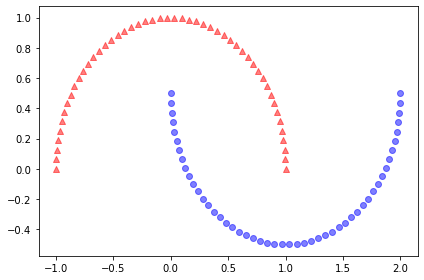

In [55]:
# 반달 모양 구분하기
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()

이 반달 모양 데이터셋은 선형적으로 구분되지 않는다. 우리의 목표는 커널 PCA로 반달 모양을 펼쳐서 선형 분류기에 적합한 입력 데이터셋으로 만드는 것이다.

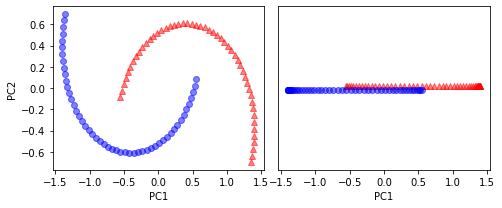

In [56]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

기본 PCA로 변환된 데이터셋을 선형 분류기가 잘 구분하기 힘들다.

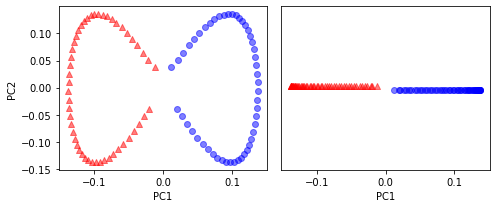

In [57]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

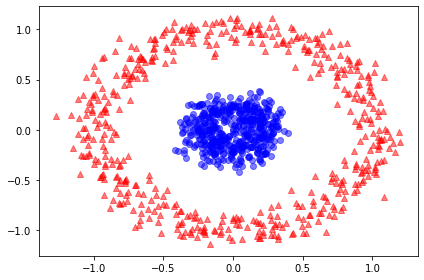

In [58]:
# 동심원 분리하기

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
plt.show()

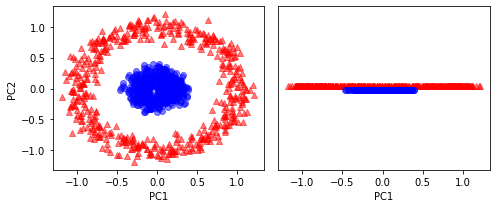

In [59]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

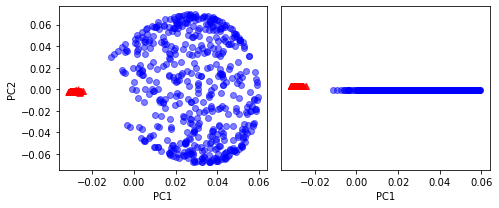

In [60]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

#### 5.3.3 새로운 데이터 포인트 투영
- 새로운 샘플 $x^{'}$를 주성분 축에 투영하려면 다음을 계산해야한다.  
    $\Phi (x^{'})^T v$

In [61]:
from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF 커널 PCA 구현

    매개변수
    ------------
    X: {넘파이 ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      RBF 커널 튜닝 매개변수
        
    n_components: int
      반환할 주성분 개수

    Returns
    ------------
     alphas: {넘파이 ndarray}, shape = [n_samples, k_features]
       투영된 데이터셋
     
     lambdas: list
       고윳값

    """
    # MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산합니다.
    sq_dists = pdist(X, 'sqeuclidean')

    # 샘플 간의 거리를 정방 대칭 행렬로 변환합니다.
    mat_sq_dists = squareform(sq_dists)

    # 커널 행렬을 계산합니다.
    K = exp(-gamma * mat_sq_dists)

    # 커널 행렬을 중앙에 맞춥니다.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # 중앙에 맞춰진 커널 행렬의 고윳값과 고유 벡터를 구합니다.
    # scipy.linalg.eigh 함수는 오름차순으로 반환합니다.
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # 최상위 k 개의 고유 벡터를 선택합니다(투영 결과).
    alphas = np.column_stack([eigvecs[:, i]
                              for i in range(n_components)])

    # 고유 벡터에 상응하는 고윳값을 선택합니다.
    lambdas = [eigvals[i] for i in range(n_components)]

    return alphas, lambdas

In [62]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [63]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [64]:
x_proj = alphas[25] # 원본 투영
x_proj

array([0.0788])

In [65]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

# 새로운 데이터포인트를 투영합니다.
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj 

array([0.0788])

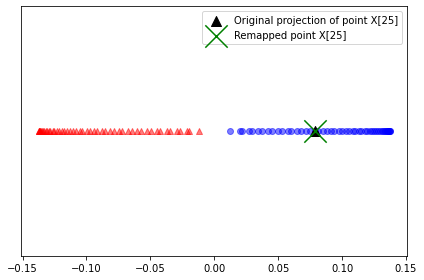

In [66]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='Original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='Remapped point X[25]', marker='x', s=500)
plt.yticks([], [])
plt.legend(scatterpoints=1)

plt.tight_layout()
plt.show()

#### 사이킷런의 커널 PCA
- 사이킷런은 sklearn.decomposition 모듈 아래 커널 PCA 클래스를 구현해 놓았다.  
- kernel 매개변수로 커널의 종류를 지정합니다.  

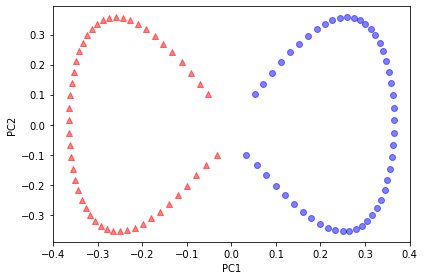

In [67]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()